##LSTM Fake News Classifier 

Goal of this program is to classify whether the news is fake or not.
This dataset is taken from Kaggle. link->https://www.kaggle.com/c/fake-news/data#


In [64]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [65]:
df=pd.read_csv('train.csv')

In [66]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [67]:
df=df.dropna()

In [68]:
X=df.drop('label',axis=1)

In [69]:
y=df['label']

### Onehot Representation

In [70]:
messages=X.copy()

In [71]:
messages.reset_index(inplace=True)

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
#Stemming & pre processing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [93]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [75]:
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3068, 3356, 821, 4812, 2651, 1336, 4735, 1107, 3515, 2806],
 [3587, 2492, 3096, 4953, 617, 2860, 4541],
 [1500, 2070, 1265, 799],
 [1569, 4250, 205, 1139, 4745, 1805],
 [2426, 617, 4040, 446, 753, 4429, 617, 240, 2985, 3190],
 [4877,
  3674,
  4418,
  3380,
  4990,
  755,
  3012,
  867,
  1125,
  134,
  3321,
  1214,
  868,
  35,
  4541],
 [935, 3239, 3692, 4930, 397, 4033, 3214, 1421, 3413, 3981, 3687],
 [354, 2266, 1539, 3681, 933, 1315, 755, 4091, 3413, 3981, 3687],
 [385, 4484, 299, 234, 4430, 2276, 4241, 4172, 755, 1831],
 [4797, 4682, 1663, 3605, 281, 1969, 74, 2350],
 [740, 4137, 1905, 4480, 1545, 3721, 272, 2091, 3106, 2729, 531],
 [1139, 3477, 2651, 2276, 755, 933],
 [343, 1743, 11, 1419, 2167, 1670, 3643, 4230, 2723],
 [1784, 3250, 3209, 401, 4864, 3069, 1212, 3413, 3981, 3687],
 [3916, 3225, 887, 1969, 2392, 3413, 3981, 3687],
 [2893, 1619, 862, 3452, 3415, 2278, 248, 207, 1536, 66],
 [1944, 547, 2492],
 [2533, 4601, 2932, 1353, 755, 2553, 3451, 4541],
 [934, 977, 3096, 29

### Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [94]:
embedded_docs

array([[   0,    0,    0, ..., 1107, 3515, 2806],
       [   0,    0,    0, ...,  617, 2860, 4541],
       [   0,    0,    0, ..., 2070, 1265,  799],
       ...,
       [   0,    0,    0, ..., 3413, 3981, 3687],
       [   0,    0,    0, ..., 3524, 2365, 1023],
       [   0,    0,    0, ..., 4609, 3233, 1430]], dtype=int32)

In [77]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3068,
       3356,  821, 4812, 2651, 1336, 4735, 1107, 3515, 2806], dtype=int32)

In [78]:
#LSTM Model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
len(embedded_docs),y.shape

(18285, (18285,))

In [80]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [81]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33)

### Model Training

In [83]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 34ms/step - loss: 0.3317 - accuracy: 0.8445 - val_loss: 0.1861 - val_accuracy: 0.9238
Epoch 2/10
192/192 [==============================] - 6s 32ms/step - loss: 0.1404 - accuracy: 0.9469 - val_loss: 0.1775 - val_accuracy: 0.9274
Epoch 3/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0963 - accuracy: 0.9638 - val_loss: 0.2058 - val_accuracy: 0.9236
Epoch 4/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0629 - accuracy: 0.9789 - val_loss: 0.2460 - val_accuracy: 0.9201
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0383 - accuracy: 0.9867 - val_loss: 0.2786 - val_accuracy: 0.9117
Epoch 6/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.3840 - val_accuracy: 0.9148
Epoch 7/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.3936 - val_accuracy: 0.9152

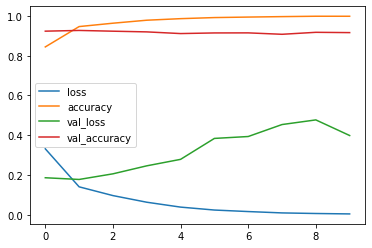

In [84]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Performance Metrics And Accuracy

In [85]:
y_pred=model.predict_classes(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3157,  283],
       [ 221, 2374]])

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9164871582435791

### Adding Dropout 

In [88]:

#LSTM with Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 7s 34ms/step - loss: 0.3652 - accuracy: 0.8234 - val_loss: 0.2036 - val_accuracy: 0.9185
Epoch 2/10
192/192 [==============================] - 6s 33ms/step - loss: 0.1580 - accuracy: 0.9368 - val_loss: 0.1726 - val_accuracy: 0.9287
Epoch 3/10
192/192 [==============================] - 7s 34ms/step - loss: 0.1151 - accuracy: 0.9566 - val_loss: 0.1837 - val_accuracy: 0.9259
Epoch 4/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0885 - accuracy: 0.9681 - val_loss: 0.1940 - val_accuracy: 0.9223
Epoch 5/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0645 - accuracy: 0.9778 - val_loss: 0.2440 - val_accuracy: 0.9223
Epoch 6/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0452 - accuracy: 0.9841 - val_loss: 0.2606 - val_accuracy: 0.9155
Epoch 7/10
192/192 [==============================] - 7s 34ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.3168 - val_accuracy: 0.9117

In [90]:
y_pred=model.predict_classes(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3165,  275],
       [ 218, 2377]])

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9183098591549296